In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns
import matplotlib.pyplot as plt
import os
import itertools
import warnings
warnings.filterwarnings('ignore')

In [54]:
df1=pd.read_excel('Data.xlsx')
df1.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [55]:
df1.shape

(5000, 14)

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [57]:
df1=df1.set_index('ID')

In [58]:
num_cols=df1[['Age','Experience','Income','CCAvg','Mortgage']]

In [59]:
# checking for null values

df1.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [60]:
# checking for unique values

for i in df1.columns:
    print(i,'\n')
    print(df1[i].unique())

Age 

[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
Experience 

[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
Income 

[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 218]
ZIP Code 

[91107 90089 94720 94

In [9]:
df1.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


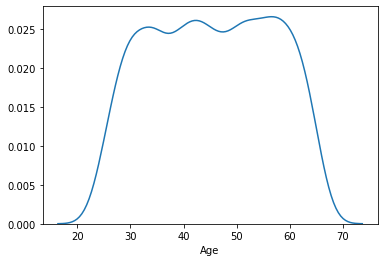

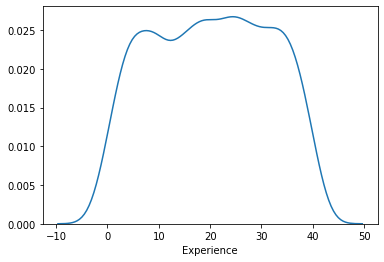

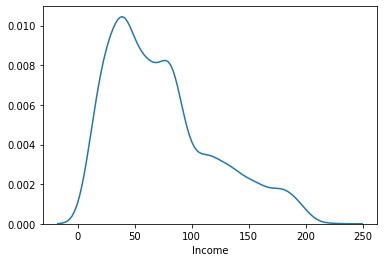

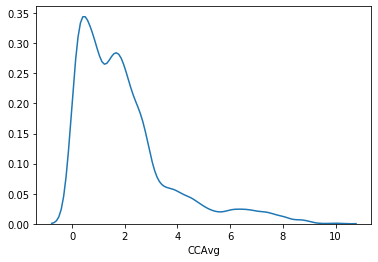

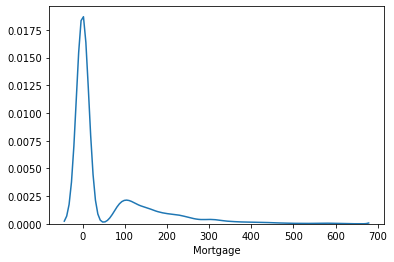

In [10]:
# checking skewness for contionuous variables

for i in num_cols:
    sns.distplot(df1[i],hist=False)
    plt.show()

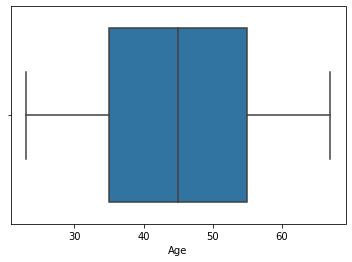

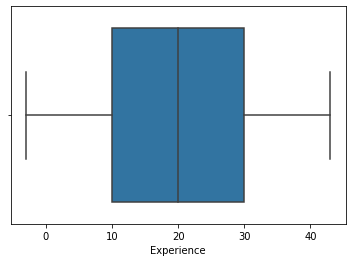

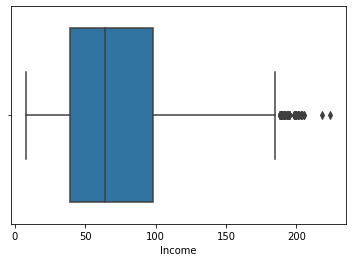

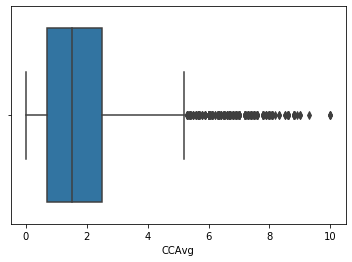

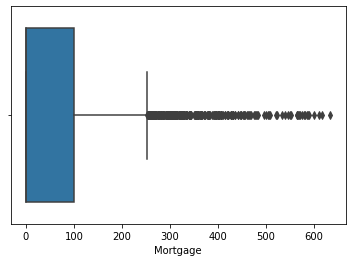

In [11]:
# checking for outliers in the continuous variables


for i in num_cols:
    sns.boxplot(df1[i])
    plt.show()

In [12]:
# treating the outliers

q1=df1['Income'].quantile(0.25)
q3=df1['Income'].quantile(0.75)
iqr=q3-q1
ul=q3+(1.5*iqr)

df1[df1['Income']>ul].index

Int64Index([  19,   48,   54,   60,  304,  330,  460,  527,  678,  741,  780,
             783,  788,  915,  918,  941, 1015, 1068, 1085, 1098, 1131, 1168,
            1205, 1278, 1308, 1321, 1396, 1433, 1505, 1552, 1553, 1593, 1638,
            1667, 1705, 1712, 1717, 1720, 1784, 1786, 1825, 1902, 1913, 1936,
            2088, 2102, 2197, 2216, 2247, 2279, 2320, 2338, 2448, 2647, 2705,
            2754, 2842, 2860, 2905, 2935, 2957, 2989, 3125, 3313, 3352, 3459,
            3484, 3544, 3569, 3609, 3640, 3759, 3805, 3822, 3897, 3944, 4010,
            4021, 4043, 4123, 4157, 4226, 4268, 4283, 4293, 4310, 4485, 4564,
            4575, 4607, 4656, 4660, 4671, 4896, 4982, 4994],
           dtype='int64', name='ID')

In [13]:
q1=df1['CCAvg'].quantile(0.25)
q3=df1['CCAvg'].quantile(0.75)
iqr=q3-q1
ul=q3+(1.5*iqr)

df1[df1['CCAvg']>ul].index

Int64Index([  10,   19,   45,   56,   62,   91,  132,  146,  151,  152,
            ...
            4756, 4783, 4860, 4874, 4889, 4909, 4912, 4938, 4981, 4994],
           dtype='int64', name='ID', length=324)

In [14]:
q1=df1['Mortgage'].quantile(0.25)
q3=df1['Mortgage'].quantile(0.75)
iqr=q3-q1
ul=q3+(1.5*iqr)

df1[df1['Mortgage']>ul].index

Int64Index([  23,   40,   43,   60,   67,  113,  120,  131,  188,  210,
            ...
            4766, 4813, 4843, 4845, 4848, 4860, 4866, 4900, 4943, 4964],
           dtype='int64', name='ID', length=291)

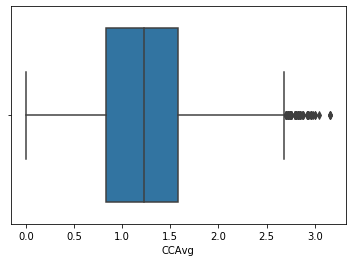

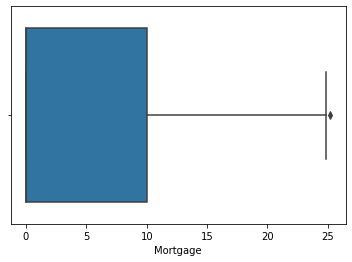

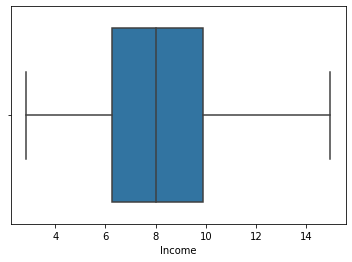

In [15]:
d= [ 'CCAvg','Mortgage','Income']

for i in d:
    df1[i]=np.sqrt(df1[i])
    sns.boxplot(df1[i])
    plt.show()

In [16]:
# checking for the balance of target variable

df1['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [17]:
# assigning x and y

x=df1.drop('Personal Loan',axis=1)
y=df1['Personal Loan']

In [18]:
import statsmodels.api as sm

In [19]:
x=df1.drop('Personal Loan',axis=1)
y=df1['Personal Loan']

In [20]:
xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.120720
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4987
Method:                           MLE   Df Model:                           12
Date:                Tue, 23 Feb 2021   Pseudo R-squ.:                  0.6182
Time:                        12:22:14   Log-Likelihood:                -603.60
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -19.3224      4.359     -4.433      0.000     -27.865     -10.779
Age                   -0.0478      0.064     -0.753      0.452      -0.172       0.077
Experience             0.0589      0.063      0.932      0.351      -0.065       0.183
Income                 1.2244      0.061     20.163      0.000       1.105       1.343
ZIP Code            -3.86e-06   4.25e-05     -0.091      0.928   -8.72e-05    7.95e-05
Family                 0.7154      0.076      9.412      0.000       0.566       0.864
CCAvg                  0.5388      0.133      4.065      0.000       0.279       0.799
Education              1.7942      0.118     15.205      0.000       1.563       2.025
Mortgage               0.0115      0.010      1.148      0.251      -0.008       0.031
Securities Account    -0.9660      0.295     -3.276      0.001      -1.544      -0.388
CD Account             3.8556      0.336     11.492      0.000       3.198       4.513
Online                -0.6909      0.161     -4.301      0.000      -1.006      -0.376
CreditCard            -1.1501      0.209     -5.511      0.000      -1.559      -0.741
======================================================================================

Possibly complete quasi-separation: A fraction 0.16 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Here we got base model. Now lets check for the variables, if they really need to exist or not for both continuous and categorical variables.

In [21]:
df1=df1.drop(['Age','Experience','Mortgage','ZIP Code'],axis=1)

In [22]:
df1.head()

,Income,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,
1,7.000000,4,1.264911,1,0,1,0,0,0
2,5.830952,3,1.224745,1,0,1,0,0,0
3,3.316625,1,1.000000,1,0,0,0,0,0
4,10.000000,1,1.643168,2,0,0,0,0,0
5,6.708204,4,1.000000,2,0,0,0,0,1


In [23]:
x=df1.drop('Personal Loan',axis=1)
y=df1['Personal Loan']

In [36]:
# train-test-split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 8)
(1500, 8)
(3500,)
(1500,)


In [25]:


from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear')

lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [26]:
# finding the metrics for lor model

from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,classification_report

y_pred_train = lr.predict(x_train)
y_prob_train = lr.predict_proba(x_train)[:,1]

print('Train Accuracy score:',accuracy_score(y_train,y_pred_train))
print('\nTrain Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print('\nTrain Roc_Auc_Score:',roc_auc_score(y_train,y_prob_train))
print('\nTrain Classification Report:\n',classification_report(y_train,y_pred_train))

print('\n')

y_pred_test = lr.predict(x_test)
y_prob_test = lr.predict_proba(x_test)[:,1]

print('Test Accuracy score:',accuracy_score(y_test,y_pred_test))
print('\nTest Confusion Matrix:\n',confusion_matrix(y_test,y_pred_test))
print('\nTest Roc_Auc_Score:',roc_auc_score(y_test,y_prob_test))
print('\nTest Classification Report:\n',classification_report(y_test,y_pred_test))

Train Accuracy score: 0.9528571428571428

Train Confusion Matrix:
 [[3157   20]
 [ 145  178]]

Train Roc_Auc_Score: 0.9617656316539835

Train Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      3177
           1       0.90      0.55      0.68       323

    accuracy                           0.95      3500
   macro avg       0.93      0.77      0.83      3500
weighted avg       0.95      0.95      0.95      3500



Test Accuracy score: 0.9473333333333334

Test Confusion Matrix:
 [[1332   11]
 [  68   89]]

Test Roc_Auc_Score: 0.9710838459386012

Test Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1343
           1       0.89      0.57      0.69       157

    accuracy                           0.95      1500
   macro avg       0.92      0.78      0.83      1500
weighted avg       0.94      0.95      0.94      1500



Here we got accuracy score for lor model as 0.95 which is pretty good for a model. Now we will apply multiple models and check for the best accuracy score.

In [37]:
def model(alg):
    alg.fit(x_train,y_train)
    ypredtrain=alg.predict(x_train)
    ypredprobtrain=alg.predict_proba(x_train)[:,1]
    
    ypredtest=alg.predict(x_test)
    ypredprobtest=alg.predict_proba(x_test)[:,1]
    
    print('Train Accuracy score:',accuracy_score(y_train,ypredtrain))
    print('\nTrain Confusion Matrix:\n',confusion_matrix(y_train,ypredtrain))
    print('\nTrain Roc_auc_score:',roc_auc_score(y_train,ypredprobtrain))
    print('\n')
    print('Test Accuracy score:',accuracy_score(y_test,ypredtest))
    print('\nTest Confusion Matrix:\n',confusion_matrix(y_test,ypredtest))
    print('\nTest Roc_auc_score:',roc_auc_score(y_test,ypredprobtest))

In [38]:
# random forest

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

model(rfc)

Train Accuracy score: 1.0

Train Confusion Matrix:
 [[3177    0]
 [   0  323]]

Train Roc_auc_score: 1.0


Test Accuracy score: 0.9886666666666667

Test Confusion Matrix:
 [[1340    3]
 [  14  143]]

Test Roc_auc_score: 0.9987574163745963


In [39]:
# decision tree

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

model(dtc)

Train Accuracy score: 1.0

Train Confusion Matrix:
 [[3177    0]
 [   0  323]]

Train Roc_auc_score: 1.0


Test Accuracy score: 0.982

Test Confusion Matrix:
 [[1335    8]
 [  19  138]]

Test Roc_auc_score: 0.9365120393073783


In [40]:
# gradient boosting

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

model(gbc)

Train Accuracy score: 0.9914285714285714

Train Confusion Matrix:
 [[3171    6]
 [  24  299]]

Train Roc_auc_score: 0.99950544304994


Test Accuracy score: 0.9893333333333333

Test Confusion Matrix:
 [[1339    4]
 [  12  145]]

Test Roc_auc_score: 0.9987076181758683


In [42]:
# Ada boost classifier

from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()

model(abc)

Train Accuracy score: 0.9705714285714285

Train Confusion Matrix:
 [[3148   29]
 [  74  249]]

Train Roc_auc_score: 0.9872043743196796


Test Accuracy score: 0.9673333333333334

Test Confusion Matrix:
 [[1329   14]
 [  35  122]]

Test Roc_auc_score: 0.9886009551768786


In [43]:
# Hyper parameter tuning for RandomForestClassifier

In [47]:
from sklearn.model_selection import RandomizedSearchCV as rsearch
from scipy.stats import randint

In [49]:
rfc = RandomForestClassifier()

params = {'n_estimators':randint(10,100),
          'max_depth':randint(1,20),
          'min_samples_leaf':randint(1,20),
          'max_features': randint(1,20)}

rsearch = rsearch(rfc,param_distributions=params,cv=3,n_jobs=-1,return_train_score=True,scoring='roc_auc')
rsearch.fit(x_train,y_train)
rsearch.best_params_

{'max_depth': 11, 'max_features': 5, 'min_samples_leaf': 2, 'n_estimators': 79}

In [51]:
rfc = RandomForestClassifier(**rsearch.best_params_)
rfc.fit(x_train,y_train)

ypredtrain=rfc.predict(x_train)
ypredprobtrain=rfc.predict_proba(x_train)[:,1]
    
ypredtest=rfc.predict(x_test)
ypredprobtest=rfc.predict_proba(x_test)[:,1]
    
print('Train Accuracy score:',accuracy_score(y_train,ypredtrain))
print('\nTrain Confusion Matrix:\n',confusion_matrix(y_train,ypredtrain))
print('\nTrain Roc_auc_score:',roc_auc_score(y_train,ypredprobtrain))
print('\n')
print('Test Accuracy score:',accuracy_score(y_test,ypredtest))
print('\nTest Confusion Matrix:\n',confusion_matrix(y_test,ypredtest))
print('\nTest Roc_auc_score:',roc_auc_score(y_test,ypredprobtest))

Train Accuracy score: 0.9968571428571429

Train Confusion Matrix:
 [[3175    2]
 [   9  314]]

Train Roc_auc_score: 0.999942504709254


Test Accuracy score: 0.9893333333333333

Test Confusion Matrix:
 [[1339    4]
 [  12  145]]

Test Roc_auc_score: 0.9987716444313758


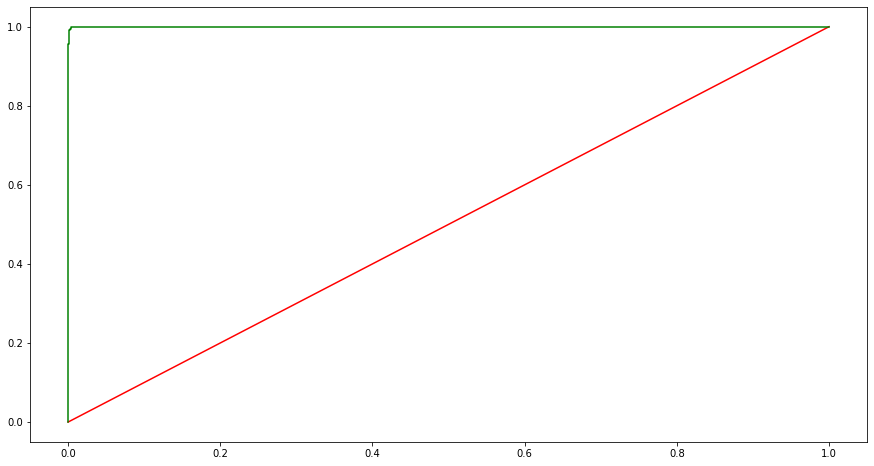

In [66]:
# roc curve for our final model after improvement

plt.figure(figsize=(15,8))
fpr,tpr,thresh=roc_curve(y_train,ypredprobtrain)
plt.plot(fpr,fpr,color='r')
plt.plot(fpr,tpr,'g')
plt.show()